# DBSCAN
Density Based Spatial Clustering of Applications with Noise.

1. Density is number of points located in an particular area.
2. Number of points more; than density more.
3. Core point circle should have 3 points in that circle.
4. The point which is not core point but can be boundry point if core point is near to them.
https://youtu.be/ZkyQ4rNIFvE

![](pic4.png)

![](pic5.png)

![](pic6.png)

class sklearn.cluster.DBSCAN
(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)[source]


In [9]:
# Importing the libraries
import numpy as np
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [11]:
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

In [12]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=4)

In [13]:
# Fitting the model
model = dbscan.fit(X)
db_labels = model.labels_ # -1 indicates outliers and other indicate groups like 0,1,2...


In [14]:
# Here, we create a NumPy array called sample_cores that has the same shape as the db_labels array. 
# This new array is initialized with all elements set to False. The purpose of this array is to serve as a mask to mark core samples 
# as True and non-core samples as False.
sample_cores=np.zeros_like(db_labels,dtype=bool) # making an array and stating everything as false
sample_cores[dbscan.core_sample_indices_]=True # now making clusters of named 0,1,2,3.....True

In [15]:
#Calculating the number of clusters
from sklearn import metrics
number_of_clusters = len(set(db_labels))- (1 if -1 in db_labels else 0)
print(number_of_clusters)

9


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
dataset.rename(columns = {'Annual_Income_(k$)':'Annual_Income'},inplace=True)

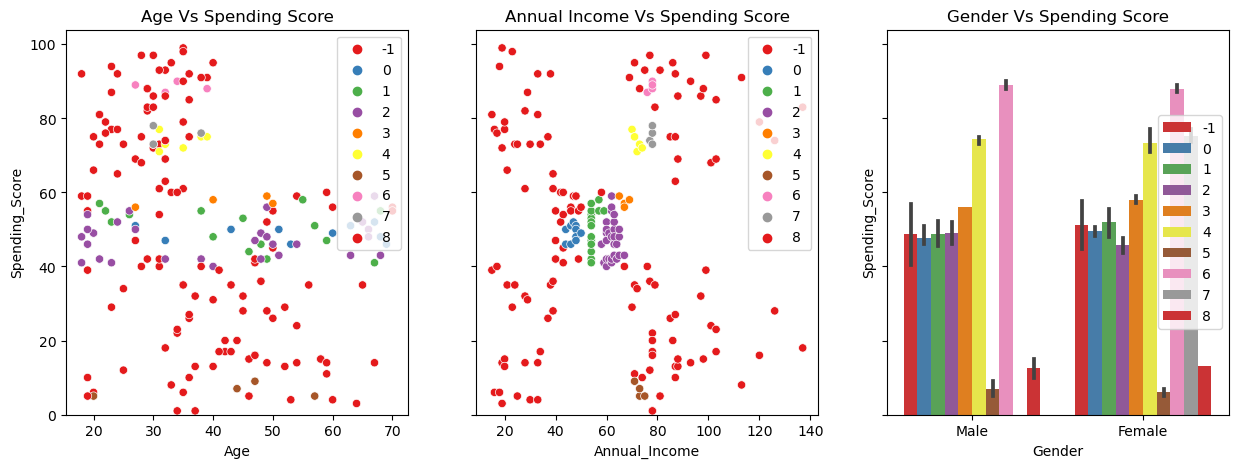

In [18]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
sns.scatterplot(ax=axes[0],x=dataset.Age, y=dataset.Spending_Score,hue=db_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1],x=dataset.Annual_Income, y=dataset.Spending_Score,hue=db_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2],x=dataset.Genre, y=dataset.Spending_Score,hue=db_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')

plt.show()

### To calculate the accuracy of clustering we use accurate score.
### But since it is unsuparvised learning there is no direct way

In [20]:
#  In general, a Silhouette Score closer to 1 indicates good clustering, 
# while a score close to -1 suggests that the data points may have been assigned to the wrong clusters, 
# and a score around 0 indicates overlapping clusters.
# not good score
print(metrics.silhouette_score(X,db_labels))

-0.1908319132560097
